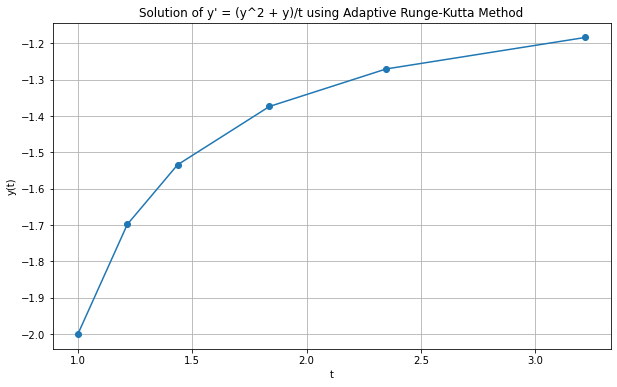

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return (y**2 + y) / t

def runge_kutta_step(t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + h/2, y + k1/2)
    k3 = h * f(t + h/2, y + k2/2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

def adaptive_runge_kutta(t0, y0, t_end, h0, tol):
    t_values = [t0]
    y_values = [y0]
    h = h0
    t = t0
    y = y0
    while t < t_end:
        y1 = runge_kutta_step(t, y, h)
        y2 = runge_kutta_step(t, y, h/2)
        y2 = runge_kutta_step(t + h/2, y2, h/2)
        error = np.abs(y2 - y1)
        if error < tol:
            y = y2
            t += h
            t_values.append(t)
            y_values.append(y)
        if error != 0:
            h = 0.9 * h * (tol / error)**0.25
    return np.array(t_values), np.array(y_values)

t0 = 1
y0 = -2
t_end = 3
h0 = 2
tol = 1e-4

t_values, y_values = adaptive_runge_kutta(t0, y0, t_end, h0, tol)

plt.figure(figsize=(10, 6))
plt.plot(t_values, y_values, marker='o', linestyle='-')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solution of y\' = (y^2 + y)/t using Adaptive Runge-Kutta Method')
plt.grid(True)
plt.show()


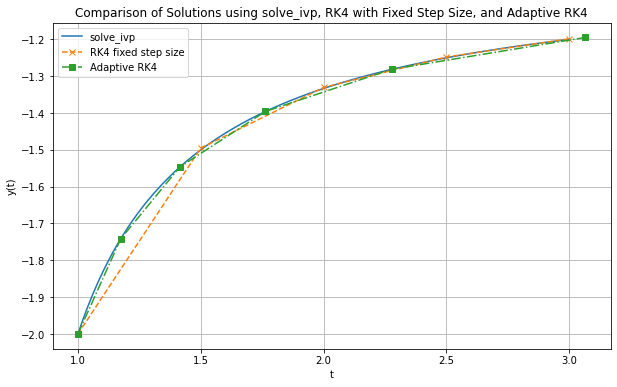

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def f(t, y):
    return (y**2 + y) / t

def runge_kutta_step(t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + h/2, y + k1/2)
    k3 = h * f(t + h/2, y + k2/2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

def adaptive_runge_kutta(t0, y0, t_end, h0, tol):
    t_values = [t0]
    y_values = [y0]
    h = h0
    t = t0
    y = y0
    while t < t_end:
        y1 = runge_kutta_step(t, y, h)
        y2 = runge_kutta_step(t, y, h/2)
        y2 = runge_kutta_step(t + h/2, y2, h/2)
        error = np.abs(y2 - y1)
        if error < tol:
            y = y2
            t += h
            t_values.append(t)
            y_values.append(y)
        if error != 0:
            h = 0.9 * h * (tol / error)**0.25
    return np.array(t_values), np.array(y_values)

# Parameters
t0 = 1
y0 = -2
t_end = 3
h0 = 0.5
tol = 1e-4

# Solve using solve_ivp
sol = solve_ivp(f, (t0, t_end), [y0], t_eval=np.linspace(1, 3, 100), rtol=tol, atol=tol)

# Solve using RK4 with fixed step size
t_values_rk4 = np.arange(t0, t_end + h0, h0)
y_values_rk4 = []
y_rk4 = y0
for t in t_values_rk4:
    y_values_rk4.append(y_rk4)
    y_rk4 = runge_kutta_step(t, y_rk4, h0)

# Solve using adaptive RK4
t_values_adaptive, y_values_adaptive = adaptive_runge_kutta(t0, y0, t_end, h0, tol)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='solve_ivp', linestyle='-')
plt.plot(t_values_rk4, y_values_rk4, label='RK4 fixed step size', marker='x', linestyle='--')
plt.plot(t_values_adaptive, y_values_adaptive, label='Adaptive RK4', marker='s', linestyle='-.')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparison of Solutions using solve_ivp, RK4 with Fixed Step Size, and Adaptive RK4')
plt.legend()
plt.grid(True)
plt.show()
